Salem Ameen, PhD student at Salford University

### Parkinsons Telemonitoring Data Set

LINEAR REGRESSION

# Import the Libraries

In [1]:
import numpy as np
import pandas
from numpy import *
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics, grid_search, cross_validation
from IPython.display import set_matplotlib_formats
from bokeh.plotting import figure, show, output_notebook
from sklearn.metrics import r2_score
from bokeh.layouts import gridplot
output_notebook()
set_matplotlib_formats('png', 'pdf')
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)

Loading BokehJS ...

# Load data

In the previous file we have not change the data as there is no missing value or add any new parameters so it can be downloaded from the web directly. 

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
data = pd.read_csv(url)
M_UPDRS = data['motor_UPDRS']
data = data.drop('motor_UPDRS', 1)
data = data.drop('total_UPDRS', 1)
from sklearn import preprocessing
dataset = data.values
X = dataset[:,0:20].astype(float)
Y = M_UPDRS.values
MEDV = M_UPDRS
feature_cols = list(data.columns.values)
print 'Number of examples',len(X)

Number of examples 5875


In [3]:
# Make developement dataset for genrilization and final testing
from sklearn.cross_validation import train_test_split
# Extracting 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0)
X = X_train
Y = y_train
new_data      = X_train
new_test_data = X_test
print 'Number of training examples',len(X_train)
print 'Number of validation examples',len(X_test)

Number of training examples 4700
Number of validation examples 1175


# Set the parameters for cross validation

In [4]:
num_folds = 10
num_instances = len(X)
seed = 7
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)

 # Set the parameters for bias-variance dilemma

In [5]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Preprocessing the data and save the model and preprocessed data

In [6]:
# According to the nature of the data spasity and there is outliter RobustScaler class is recomandit 
# but when I tried both of them the result seems is same
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)

In [7]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) # use same transform for testing data
X = X_train

In [8]:
# save transformed data
np.save('./data/X_train', X_train)
np.save('./data/y_train', y_train)
np.save('./data/X_test', X_test)
np.save('./data/y_test', y_test)

In [9]:
# save the model scaler to the desk
from sklearn.externals import joblib
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl', 'scaler.pkl_01.npy', 'scaler.pkl_02.npy', 'scaler.pkl_03.npy']

In [10]:
# Test the model if it is work
scalerTest = joblib.load('scaler.pkl')
new_data_scaled = scalerTest.transform(new_test_data)
print " =================================================================>>>>> done"
print new_data_scaled

 =================================================================>>>>> done
[[ 1.56638181  0.35745305  1.45347266 ...,  0.10654841  0.65433521
   0.34236736]
 [ 1.08416036  0.69933936 -0.68800744 ...,  1.03217561  1.35448669
   2.09798914]
 [ 0.11971746 -0.66820588  1.45347266 ..., -0.37688437  0.55760283
  -0.48973219]
 ..., 
 [ 1.56638181  0.35745305  1.45347266 ...,  1.28447486 -0.04104284
   0.85186293]
 [-1.24657665 -0.21235747 -0.68800744 ...,  0.08110981 -0.87695661
   0.46320715]
 [ 0.11971746 -0.66820588  1.45347266 ...,  0.38418689  0.68227388
   0.30398295]]


# 1. Linear Regression

Linear regression assumes that the input variables have a Gaussian distribution. It is also assumed that input variables are relevant to the output variable and that they are not highly correlated with each other (a problem called collinearity).



## Learning Curve 

In essence, what we’re doing it training the exact same model with increasingly large fractions of our total training data, and plotting the error of the training and test sets at each step.

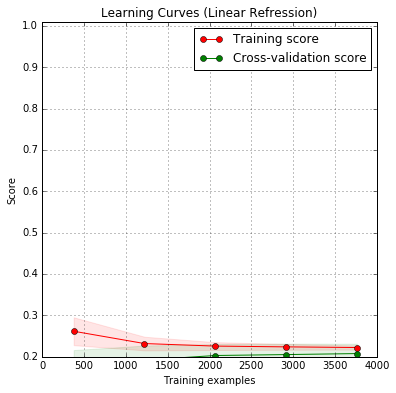

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
title = "Learning Curves (Linear Refression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(X.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
plot_learning_curve(model, title, X, Y, ylim=(0.2, 1.01), cv=cv, n_jobs=-1)
plt.show()

In [12]:
# More data from learning curve to show the process of building the model
train_sizes, train_scores, valid_scores = learning_curve(
     model, X, Y, train_sizes=[50, 80, 110], cv=cv, n_jobs=4)

print 'train_sizes = ', train_sizes

print ' training scores'
print ' 50 training sizees'
print train_scores[0].mean(),'±',train_scores[0].std()
print ' 80 training sizees'
print train_scores[1].mean(),'±',train_scores[1].std()
print ' 110 training sizees'
print train_scores[2].mean(),'±',train_scores[2].std()

print '\n validation scores'
print ' 50 validation scores'
print valid_scores[0].mean(),'±',valid_scores[0].std()
print ' 80 validation scores'
print valid_scores[1].mean(),'±',valid_scores[1].std()
print ' 110 validation scores'
print valid_scores[2].mean(),'±',valid_scores[2].std()

train_sizes =  [ 50  80 110]
 training scores
 50 training sizees
0.531643363738 ± 0.0993273713054
 80 training sizees
0.407728998781 ± 0.082268559978
 110 training sizees
0.36244646453 ± 0.0706071563844

 validation scores
 50 validation scores
-1.66686448794 ± 1.75447541479
 80 validation scores
-0.601211376993 ± 0.997230313866
 110 validation scores
-0.248401878345 ± 0.43142259446


## Cross validation

In [13]:
scoring = 'mean_squared_error'
results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print 'Scoring according to mean_squared_error'
print results
print '\n Mean      Standard deviation'
print("%.2f      %.2f" % (results.mean(), results.std()))
## Fit the model
model.fit(X,Y)
print '\n print intercept and coefficients'
print model.intercept_
print model.coef_
# pair the feature names with the coefficients
print '\n(feature, coefficients)'
print zip(feature_cols, model.coef_)
# Linear qu. of the model

print ("\n Predicted Target = %.2f +(%.2f)X1 +(%.2f)X2 +(%.2f)X3 +(%.2f)X4+(%.2f)X4 +(%.2f)X6 +(%.2f)X6 +(%.2f)X8+(%.2f)X9+(%.2f)X10 +(%.2f)X11+(%.2f)X12 +(%.2f)X13"
       % (model.intercept_, model.coef_[0], model.coef_[1],model.coef_[2],model.coef_[3],
       model.coef_[4],model.coef_[5],model.coef_[6],model.coef_[7],
      model.coef_[8], model.coef_[9],model.coef_[10],model.coef_[11],
      model.coef_[12]))
print ("\n Predicted Target = %.2f +(%.2f)%s +(%.2f)%s +(%.2f)%s +(%.2f)%s+(%.2f)%s +(%.2f)%s +(%.2f)%s +(%.2f)%s+(%.2f)%s+(%.2f)%s +(%.2f)%s +(%.2f)%s +(%.2f)%s"
       % (model.intercept_, model.coef_[0], feature_cols[0], model.coef_[1], feature_cols[1],
          model.coef_[2], feature_cols[2],model.coef_[3], feature_cols[3],
       model.coef_[4], feature_cols[4],model.coef_[5], feature_cols[5],model.coef_[6], feature_cols[6],
          model.coef_[7], feature_cols[7],
      model.coef_[8], feature_cols[8], model.coef_[9], feature_cols[9],
          model.coef_[10], feature_cols[10],model.coef_[11], feature_cols[11],
      model.coef_[12], feature_cols[12]))

Scoring according to mean_squared_error
[-48.17540357 -52.49288642 -49.18982358 -52.84393506 -52.0679597
 -55.01923701 -53.42232808 -50.66028408 -56.5022817  -51.73263459]

 Mean      Standard deviation
-52.21      2.37

 print intercept and coefficients
21.3215670638
[  2.17529610e+00   1.77362829e+00  -1.12629284e+00   6.81136002e-01
   7.59971603e-01  -1.83491851e+00  -1.57408092e+02  -1.06875386e+00
   1.59290575e+02   1.47634346e+00  -1.90364879e-01   7.66016113e+01
  -2.79300349e-01   7.90163587e-01  -7.86354232e+01  -1.14923252e+00
  -1.40911929e+00   2.33509204e-03  -1.94310740e+00   1.43045706e+00]

(feature, coefficients)
[('subject#', 2.1752961008099718), ('age', 1.773628290674107), ('sex', -1.1262928384943904), ('test_time', 0.6811360023283981), ('Jitter(%)', 0.75997160301366407), ('Jitter(Abs)', -1.8349185084587112), ('Jitter:RAP', -157.40809212890002), ('Jitter:PPQ5', -1.0687538585520242), ('Jitter:DDP', 159.29057510647971), ('Shimmer', 1.4763434614160857), ('Shimmer(dB)'

To be more precise these valrible is not the input feature as descripe on the dataset, those varibles in scaled virsion on the orginal onces. So, to be more correct I should assign to them another varibles but for easy to unserstand I kept them as they were.

## Coefficients Of Determination {Calculating R^2}

R^2, Close to one is better

In [14]:
predicted = cross_val_predict(model, X, Y, cv=kfold)
r_squared = r2_score(Y, predicted, multioutput='variance_weighted')
print 'R-squared = ',r_squared

R-squared =  0.211982200046


## More results on linear regression by using Statsmodel

http://statsmodels.sourceforge.net/stable/  

In [15]:
import statsmodels.api as sm
results = sm.OLS(Y,sm.add_constant(X)).fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     66.43
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          8.47e-236
Time:                        12:27:40   Log-Likelihood:                -15936.
No. Observations:                4700   AIC:                         3.191e+04
Df Residuals:                    4679   BIC:                         3.205e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.3216      0.105    203.029      0.0

## Residual Plot

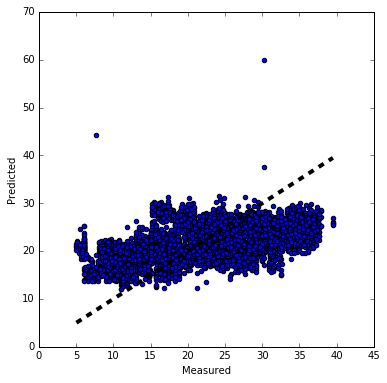

In [16]:
predicted = cross_val_predict(model, X, Y, cv=kfold)
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
# Plotining using bokeh
#TOOLS = [BoxSelectTool(), HoverTool()]
#TOOLS = 'hover,box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
p = figure(plot_width=500, plot_height=500, tools=TOOLS)
p.scatter(Y, predicted,x="jjj", marker="o", color="#80B1D3", line_width=3)
p.title.align = "center"
p.xaxis.axis_label = "Measured"
p.xaxis.axis_label_text_color = "#aa6666"
#p.xaxis.axis_label_standoff = 30
p.xaxis.major_tick_line_color = "firebrick"
p.xaxis.major_tick_line_width = 3
p.xaxis.minor_tick_line_color = "orange"
p.yaxis.axis_label = "Predicted"
p.yaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_color = "#aa6666"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
#p.line([Y.min(), Y.max()], [Y.min(), Y.max()], line_dash="4 4", line_width=2, color='red')

# create a new plot with the toolbar below
# line_dash="4 4", line_width=2, color='red'
p.line([Y.min(), Y.max()], [Y.min(), Y.max()], line_dash="4 4", line_width=2, line_color="black")
show(p)

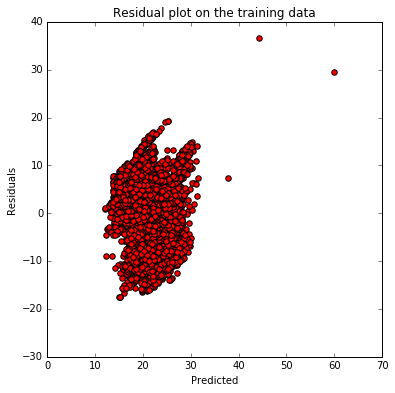

In [18]:
plt.scatter(predicted, (predicted - Y), c='r', s=30)
plt.title("Residual plot on the training data")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

In [19]:
# Plotining using bokeh
#TOOLS = 'hover,box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
TOOLS = 'box_zoom,box_select,crosshair,resize,reset,lasso_select,pan,save,poly_select,tap,wheel_zoom,undo'
p = figure(plot_width=500, plot_height=500, title="Residual plot on the training data", tools=TOOLS)
p.scatter(predicted, (predicted - Y),x="jjj", marker="o", color="#80B1D3", line_width=3)
p.title.align = "center"
p.xaxis.axis_label = "Predicted"
p.xaxis.axis_label_text_color = "#aa6666"
#p.xaxis.axis_label_standoff = 30
p.xaxis.major_tick_line_color = "firebrick"
p.xaxis.major_tick_line_width = 3
p.xaxis.minor_tick_line_color = "orange"
p.yaxis.axis_label = "Residuals"
p.yaxis.axis_label_text_font_style = "italic"
p.yaxis.axis_label_text_color = "#aa6666"
p.background_fill_color = "beige"
p.background_fill_alpha = 0.5
#p.line([2,38], [0, 0], line_dash="4 4", line_width=2, color='red')
show(p)

## Pipeline

The best to deliver the model by pipeline the operation then at deployment can be done in one model.

  I used two ways to check the pipeline so any one can be fine

In [20]:
# Use Pipeline
# ANOVA 
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
anova_filter = SelectKBest(f_regression, k=13)
LR = LinearRegression()
anova_LinReg = Pipeline([('scaler_Input',scaler), ('anova', anova_filter), ('LinReg', LR)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
anova_LinReg.set_params(anova__k=13).fit(new_data, Y)
prediction = anova_LinReg.predict(new_data)
print anova_LinReg.score(new_data, Y)                        
# getting the selected features chosen by anova_filter
results = cross_validation.cross_val_score(anova_LinReg, new_data, Y, cv=kfold, scoring=scoring)
print 'Scoring according to mean_squared_error'
print results
print '\n Mean      Standard deviation'
print("%.2f      %.2f" % (results.mean(), results.std()))
print anova_LinReg.named_steps['anova'].get_support()
r_squared = r2_score(Y, prediction, multioutput='variance_weighted')
print 'R-squared = ',r_squared

0.192169111257
Scoring according to mean_squared_error
[-49.44811731 -55.08234939 -51.68076914 -54.79985567 -54.46625111
 -55.92813457 -53.59031519 -51.66989666 -58.50452162 -53.25443478]

 Mean      Standard deviation
-53.84      2.41
[ True  True False False  True False False False False  True  True  True
  True  True  True False  True  True  True  True]
R-squared =  0.192169111257


In [21]:
# Using make_pipeline
from sklearn.pipeline import make_pipeline

# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=13)
anova_lr = make_pipeline(scaler, anova_filter, LR)
anova_lr.fit(new_data, Y)
prediction = anova_lr.predict(new_data)
r_squared = r2_score(Y, prediction, multioutput='variance_weighted')
print 'R-squared = ',r_squared

R-squared =  0.192169111257


### Save the Pipeline model for developement

In [22]:
# save the model scaler to the desk
from sklearn.externals import joblib
joblib.dump(anova_lr, 'anova_lr.pkl') 

['anova_lr.pkl',
 'anova_lr.pkl_01.npy',
 'anova_lr.pkl_02.npy',
 'anova_lr.pkl_03.npy',
 'anova_lr.pkl_04.npy',
 'anova_lr.pkl_05.npy',
 'anova_lr.pkl_06.npy',
 'anova_lr.pkl_07.npy']

In [23]:
# Test the model if it is work
anova_lrTest = joblib.load('anova_lr.pkl')
NewPred = anova_lrTest.predict(new_data)
print " =================================================================>>>>> done"
r_squared = r2_score(Y, NewPred, multioutput='variance_weighted')
print 'R-squared = ',r_squared

 =================================================================>>>>> done
R-squared =  0.192169111257


In [24]:
# test on single data point, randomly choose point number 55
print 'Point of training data before normalization\n',new_data[55]
print '\nThe read target of the data = ', Y[55]
NewPred = anova_lrTest.predict([new_data[55]])
print '\nThe Predicted target of the data = ', NewPred



Point of training data before normalization
[  2.60000000e+01   4.90000000e+01   0.00000000e+00   3.17820000e+01
   1.18000000e-02   1.27000000e-04   7.05000000e-03   6.00000000e-03
   2.11500000e-02   5.81300000e-02   5.27000000e-01   3.21500000e-02
   3.45600000e-02   4.39900000e-02   9.64400000e-02   3.43700000e-02
   1.74210000e+01   6.30040000e-01   7.72870000e-01   4.15090000e-01]

The read target of the data =  25.706

The Predicted target of the data =  [ 18.57869545]


## Conclusion 

From the learning cure the model shows some high bias even though the model started to learn about the structure of the data.